# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm

# Build figures inline, set visualization style
%matplotlib inline
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# before starting questions, view and explore data
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# see how many observations and variables you have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## Q1: Is the distribution of body temperatures normal?

In [4]:
# check the summary statistics
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


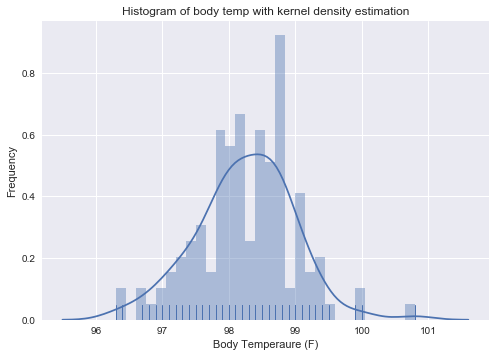

In [5]:
# view a histogram of body temperatures
sns.distplot(df.temperature, bins= 30, kde=True, rug=True);
plt.title('Histogram of body temp with kernel density estimation');
plt.xlabel('Body Temperaure (F)');
plt.ylabel('Frequency');

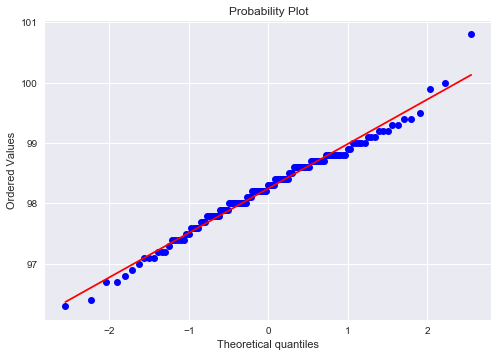

In [6]:
# check normality with Q-Q plot
scipy.stats.probplot(df.temperature, dist='norm', fit=True, plot=plt);

In [7]:
# check for normality using scipy.stats
scipy.stats.mstats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

### Conclusion: The body temperature measurements are normally distributed
### Justification:
* If a large number of body temperature samples are taken and they are independent (not dependant on each other) from the population of body temperatures the central limit theorem (CLT) predicts that means of the samples will approach a normal distribution even if the distribution of the population is not normal.
* The normal quantile-quantile plot above supports our assumption that the data are plausibly normally distributed. The body temperature measurements are likely normally distributed because the quantiles of the body temperature sample data generally fall along the line of quantiles from the theoretical normal distribution.
* The scipy normaltest on the array of temperature values tests the null hypothesis that the sample comes from a normal distribution. The p-value (p = 0.26) is for a 2-sided chi-square test, so a large p-value means that we fail to reject the null hypothesis that the sample comes from a normal distribution.

## Q2: Is the sample size large? Are the observations independent?

* The human body temperature dataset provided includes 130 body temperature measurements. Reapeatedly taking the average with samples of 30 or more from a population will result in normally distributed means, so our sample size of 130 is large enough. 
* Apparently, each body temperature measurement in the dataset is from a different individual. Measurements of body temperature (as well as heart rate) for different individuals are considered independent.

## Q3: Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  _t_  or  _z_  statistic?
* Now try using the other test. How is the result different? Why?

### Perform a hypothesis test to determine if the true population mean is likely different from 98.6 (F)
__Null__: There is no difference between 'normal' (98.6F) body temp and the true population mean. __Alternative__: There is a difference between 'normal' body temperature and the true population mean.

__Appropriate test__: For these hypotheses, a 1-sample test is appropriate. Our null hypothesis states that there is no difference between the sample mean and the population mean. By comparison, a two-sample test would be appropriate for comparing two sample groups (e.g., males vs. females, children vs. adults, dogs vs. cats, etc.)

__Test statistic__: Our sample size is relatively large, n=130, so a _z_-test is appropriate (_t_-tests are indicated when sample sizes are small; e.g., less than n=30). Ideally we would also have the population standard deviation for a _z_-test, but we do not have this population statistic. However, since we have a large sample size (n=130), under the cenral limit theorem we can assume that our sample standard deviation can estimate the population standard deviation. A _z_ statistic is appropriate for this hypthesis test.

In [8]:
import numpy as np
# calculate sample statistics
mu = np.mean(df.temperature)
std = np.std(df.temperature, ddof=0) # the default calculation (ddof=0) estimates the population standard deviation
n = len(df.temperature)
print('The sample mean is ',mu)
print('The sample standard deviation that estimates the population std is ', std)
print('The sample size is ', n)

The sample mean is  98.24923076923078
The sample standard deviation that estimates the population std is  0.7303577789050377
The sample size is  130


In [9]:
# perform hypothesis test with two-sided z-test
# calculate the test statistic
z_value = (mu - 98.6)/(std/(np.sqrt(n)))
print('The test statistic z is', abs(z_value), 'indicating that it is 5.5 standard deviations from the mean.')
# calculate the p-value for a two-sided z-test
p_value = scipy.stats.norm.cdf(z_value)*2
print('p-value = ', p_value)
# state the conclusion
if p_value < 0.05:
    print('Reject the Null hypothesis: There is a difference between NORMAL temp and the population mean.')
else:
    print('Fail to reject the Null: There is no difference between NORMAL temp and the population mean.')

The test statistic z is 5.47592520208 indicating that it is 5.5 standard deviations from the mean.
p-value =  4.35231516588e-08
Reject the Null hypothesis: There is a difference between NORMAL temp and the population mean.


In [10]:
# compare t-test results to above
scipy.stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

__Interpretation__: Because the sample size is large (>30) the t-test statistic and the z-test statistic are similar. The conclusion, to reject the null hypothesis, is the same based on both tests.

## Q4: Draw a small sample of size 10 from the data and repeat both tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  _t_  and  _z_  statistic?

In [11]:
# create a series that is a random sample of 10 of the body temp measurements
sub_temp = df.temperature.sample(n=10)
sub_temp.describe()

count    10.000000
mean     97.890000
std       0.897466
min      96.700000
25%      97.200000
50%      98.050000
75%      98.600000
max      99.000000
Name: temperature, dtype: float64

In [12]:
# calculate the z-test statistic from the subset of temperatures
# calculate sample statistics
mu2 = np.mean(sub_temp)
std2 = np.std(sub_temp, ddof=0) # the default calculation (ddof=0) estimates the population standard deviation
n2 = len(sub_temp)
print('The sub-sample mean is ',mu2)
print('The sub-sample standard deviation is ', std2)
print('The sub-sample size is ', n2)

The sub-sample mean is  97.89000000000001
The sub-sample standard deviation is  0.8514105942493304
The sub-sample size is  10


In [13]:
# perform hypothesis test with two-sided z-test
# calculate the test statistic of the sub-sample
z_value2 = (mu2 - 98.6)/(std2/(np.sqrt(n2)))
print('The test statistic z is', abs(z_value2), 'indicating that it is', abs(z_value2), 'standard deviations from the mean.')
# calculate the p-value for a two-sided z-test
p_value2 = scipy.stats.norm.cdf(z_value2)*2
print('p-value = ', p_value2)
# state the conclusion
if p_value2 < 0.05:
    print('Reject the Null hypothesis: There is a difference between NORMAL temp and the population mean.')
else:
    print('Fail to reject the Null: There is no difference between NORMAL temp and the population mean.')

The test statistic z is 2.63705567429 indicating that it is 2.63705567429 standard deviations from the mean.
p-value =  0.00836291047344
Reject the Null hypothesis: There is a difference between NORMAL temp and the population mean.


In [14]:
# run a t-test on the small subset of temps
scipy.stats.ttest_1samp(sub_temp, 98.6)

Ttest_1sampResult(statistic=-2.5017306742323946, pvalue=0.03376580728842965)

__Interpretation__: If sample sizes are as small (n=10) and population standard deviation is not known, then a _t_-test is more appropriate.  When I took multiple different random samples of n=10 from the full body temperature data series 1) the descriptive statistics were variable with each subset, 2) the test statistics and p-values were also varialbe, but 3) the conclusion for both _z_ and _t_ tests were always to reject the null hypothesis.

## Q5: At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.
* __Definitions__:
    * __Margin of error__: Margin of error - 'the amount allowed for miscalculation'. The margin of error for a sample mean is calculated from the critical z-value for the selected level of confidence times the standard error for the mean (the sample standard deviation divided by the square-root of the sample size). The margin of error is very small and approaches zero as the sample size grows very large. You can calculate confidence intervals with margin of error.
    * __Confidence Interval__: The width of confidence intervals is completely determined by sampling error. If you could sample the entire population (everyone's temperature!) then your confidence interval would be zero. CIs can only tell you about the parameter of interest, not about the distribution of values. The confidence interval does not allow you predict that some percentage of future body temperature measurements will fall within the range of the CI. Confidence intervals are the mean +/- the appropriate margin of error.
    * __Prediction Interval__: A prediction interval calculation gives a range of values that are likely to contain a new temperature measurement, and is always wider than a CI. Gives information about the distribution of values.
    * __Tolerance Interval__: Range of values likely to include a specific portion of the population. In contrast to CI, tolerance intervals widths depend on both sampling error and the variance in the population. Tolerance intervals can be estimated with percentiles, but unless you can sample the entire population the percentile estimates also have error associated with them. 
    
    __Sources__: 
    [MiniTab Blog](http://blog.minitab.com/blog/adventures-in-statistics-2/when-should-i-use-confidence-intervals-prediction-intervals-and-tolerance-intervals)
    [Prediction Interval - Wikipedia](https://en.wikipedia.org/wiki/Prediction_interval#Unknown_mean.2C_unknown_variance)
    
    

In [16]:
# find the z-critical value for 95%
z_critical = scipy.stats.norm.ppf(q = 0.975) #q = confidence interval of 95%
print('The critical value for z is',z_critical)
# compute margin of error for body temperature data: z-critical * sem
moe = z_critical * (std/(np.sqrt(n)))
print('The margin of error for body temperatures is', moe)
# calculate the 95% CI using the margin of error
moe_low, moe_high = np.array([mu - moe, mu + moe])
print('Lower margin of error', moe_low)
print('Upper margin of error', moe_high)

The critical value for z is 1.95996398454
The margin of error for body temperatures is 0.125548657774
Lower margin of error 98.1236821115
Upper margin of error 98.374779427


In [17]:
# compute the 95% confidence interval of body temperature data
# with scipy.stats the norm.interval method gives the endpoints of the range containing alpha percent of a distribution
# where: alpha= 0.95, loc=mu [sample mean], scale = standard error of measurement (or of mean)
CI_low, CI_high = scipy.stats.norm.interval(0.95, mu, scipy.stats.sem(df.temperature))
print('Low end of CI', CI_low)
print('Upper end of CI', CI_high)

Low end of CI 98.1231964282
Upper end of CI 98.3752651103


In [18]:
# compute prediction interval of body temperature data
# where: alpha= 0.95, loc=mu [sample mean], scale = sample standard deviation *sqrt((1 + 1/(n)))
# note: the prediction interval would be the same practically speaking if we used std for the scale term
PI_low, PI_high = scipy.stats.norm.interval(0.95, mu, (std*(np.sqrt(1+1/(n)))))
print('Prediction interval, low end:', PI_low)
print('Prediction interval, upper end:', PI_high)

Prediction interval, low end: 96.8122607012
Prediction interval, upper end: 99.6862008373


In [20]:
# estimate the tolerance interval
TI_low, TI_high = np.percentile(df.temperature, [2.5, 97.5])
print('Tolerance interval lower:', TI_low)
print('Tolerance interval upper:', TI_high)

Tolerance interval lower: 96.7225
Tolerance interval upper: 99.4775


__Interpretation__: 
If we were to use the margin of error and the 95% confidence interval to determine what body temperature should be considered abnormal, then a large proportion of our sample group would be told they are 'sick'. The 95% confidence interval of the body temperature sample group (n=130) is narrow (98.12 F - 98.38 F). The CI would be even more narrow with a very large sample size (e.g., n=100000), approaching zero. For our subsampled (n=10) analysis the CI would be wider (97.8 F - 98.7 F) as the margin of error increases. 
A better interval to define 'abnormal' body temperatures would be the prediction interval. Given our data, a new temperature measurement is likely to fall between 96.8 F and 99.5 F. We could consider new temperature measurements outside of this range to be 'abnormal'.

## Q6: Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

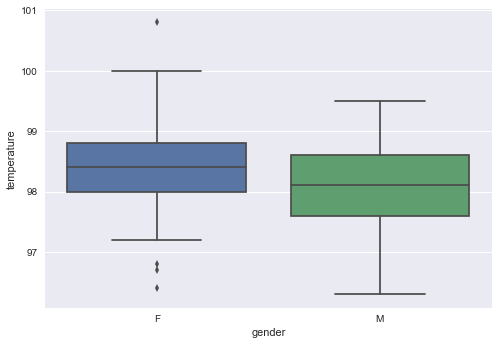

In [21]:
# explore the data of body temp by 'gender' visually
# build boxplot of temp by 'gender'
sns.boxplot(x='gender', y='temperature', data=df)

In [22]:
# check out the male and female sample sizes
male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']
print('Male sample size is', len(male_temps))
print('Female sample size is', len(female_temps))

Male sample size is 65
Female sample size is 65


In [23]:
# use describe() to calculate summary stats for male temps
male_temps.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [24]:
# use describe() to calculate summary stats for male temps
female_temps.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

* __Question__: Are male and female 'normal', mean body temperatures different?
* __Method__: A two sample _t_-test is appropriate to compare the means of two independent groups. The t-value is calculated from the difference of the two means divided by a measure of variablility (depending on if you assume equal variance or not).
* __Null Hypothesis__: There is no difference between the male body temperature mean and the female body temperature mean.
* __Alternative__: There is a difference between mean male body temp and mean female body temp.

In [25]:
# perform a independent, two sample t-test. Assume equal population variance.
scipy.stats.ttest_ind(female_temps, male_temps, equal_var=True)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

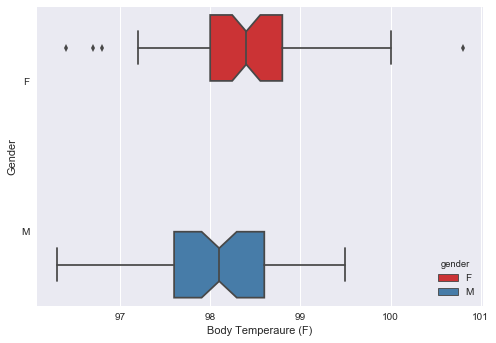

In [26]:
# redesign the boxplot to illustrate data
sns.boxplot(x='temperature', y='gender', data=df, hue='gender', palette='Set1', notch=True, width=.9);
plt.xlabel('Body Temperaure (F)');
plt.ylabel('Gender');

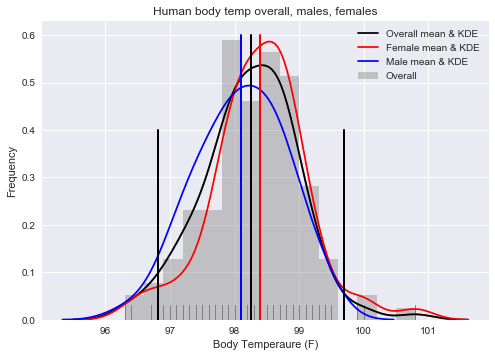

In [27]:
# overlay histogram of body temperatures for all subjects, males, females
sns.distplot(df.temperature, bins= 15, kde=True, rug=True, color='gray', label='Overall');
sns.distplot(df.temperature, hist=False, kde=True, rug=False, color='black', label='Overall mean & KDE');
sns.distplot(female_temps, hist=False, kde=True, color='red', label='Female mean & KDE');
sns.distplot(male_temps, hist=False, kde=True, color='blue', label= 'Male mean & KDE');
plt.title('Human body temp overall, males, females');
plt.xlabel('Body Temperaure (F)');
plt.ylabel('Frequency');
plt.plot([PI_low, PI_low], [0.4, 0], linewidth = 2, color = "black", label='95% PI');
plt.plot([PI_high, PI_high], [0.4, 0], linewidth = 2, color = "black");
plt.plot([mu, mu], [0.6, 0], linewidth = 2, color='black');
plt.plot([np.mean(female_temps), np.mean(female_temps)], [0.6, 0], linewidth = 2, color='red');
plt.plot([np.mean(male_temps), np.mean(male_temps)], [0.6, 0], linewidth = 2, color='blue');

### __Analysis of human body temperature by 'gender'__
We explored differences in basal body temperatures in a group of healthy adults (n=130). Average basal body temperature differs significantly (_t_(64) = 2.3, p = 0.02) for males and females in our sample. Mean basal body temperature for males was 98.1 degrees Fahrenheit. Female mean basal body temperature was slightly higher, 98.4 F. These means are within the overall prediction interval (PI, indicated by black vertical lines above) and less than the temperature considered 'normal' for humans (98.6 F). Here, we use the prediction interval to indicate the upper and lower bounds of 'normal' body temperature: a new temperature measurement is likely to fall between 96.8 F and 99.5 F. We could consider new temperature measurements outside of this range to be 'abnormal'. The differences between male and female basal body temperature means should be explored further. The sample of female temperatures appears to have potential outliers. These could be investigated using the accompanying heart rate data. If removal of outliers is justified, the difference between male and female means may change and may no longer be significantly different. Alternatively, there are physiological differences between males and females that may result in different basal body temperatures. Female basal body temperature usually decreases before ovulation and increases again following ovulation. These changes in basal body temperature are detected in the majority (80%) of female subjects (Moghissi 1976). Our sample of 65 female subjects would likely include individuals affected by hormonal changes associated with ovulatory cycles.

__Citation__

Moghissi, Kamran S. "Accuracy of basal body temperature for ovulation detection." Fertility and sterility 27.12 (1976): 1415-1421.